Allow array updating and sum query to be O(log(n))

### Array to Tree
Turn array into binary tree where each node is a segment of the array<br><br>
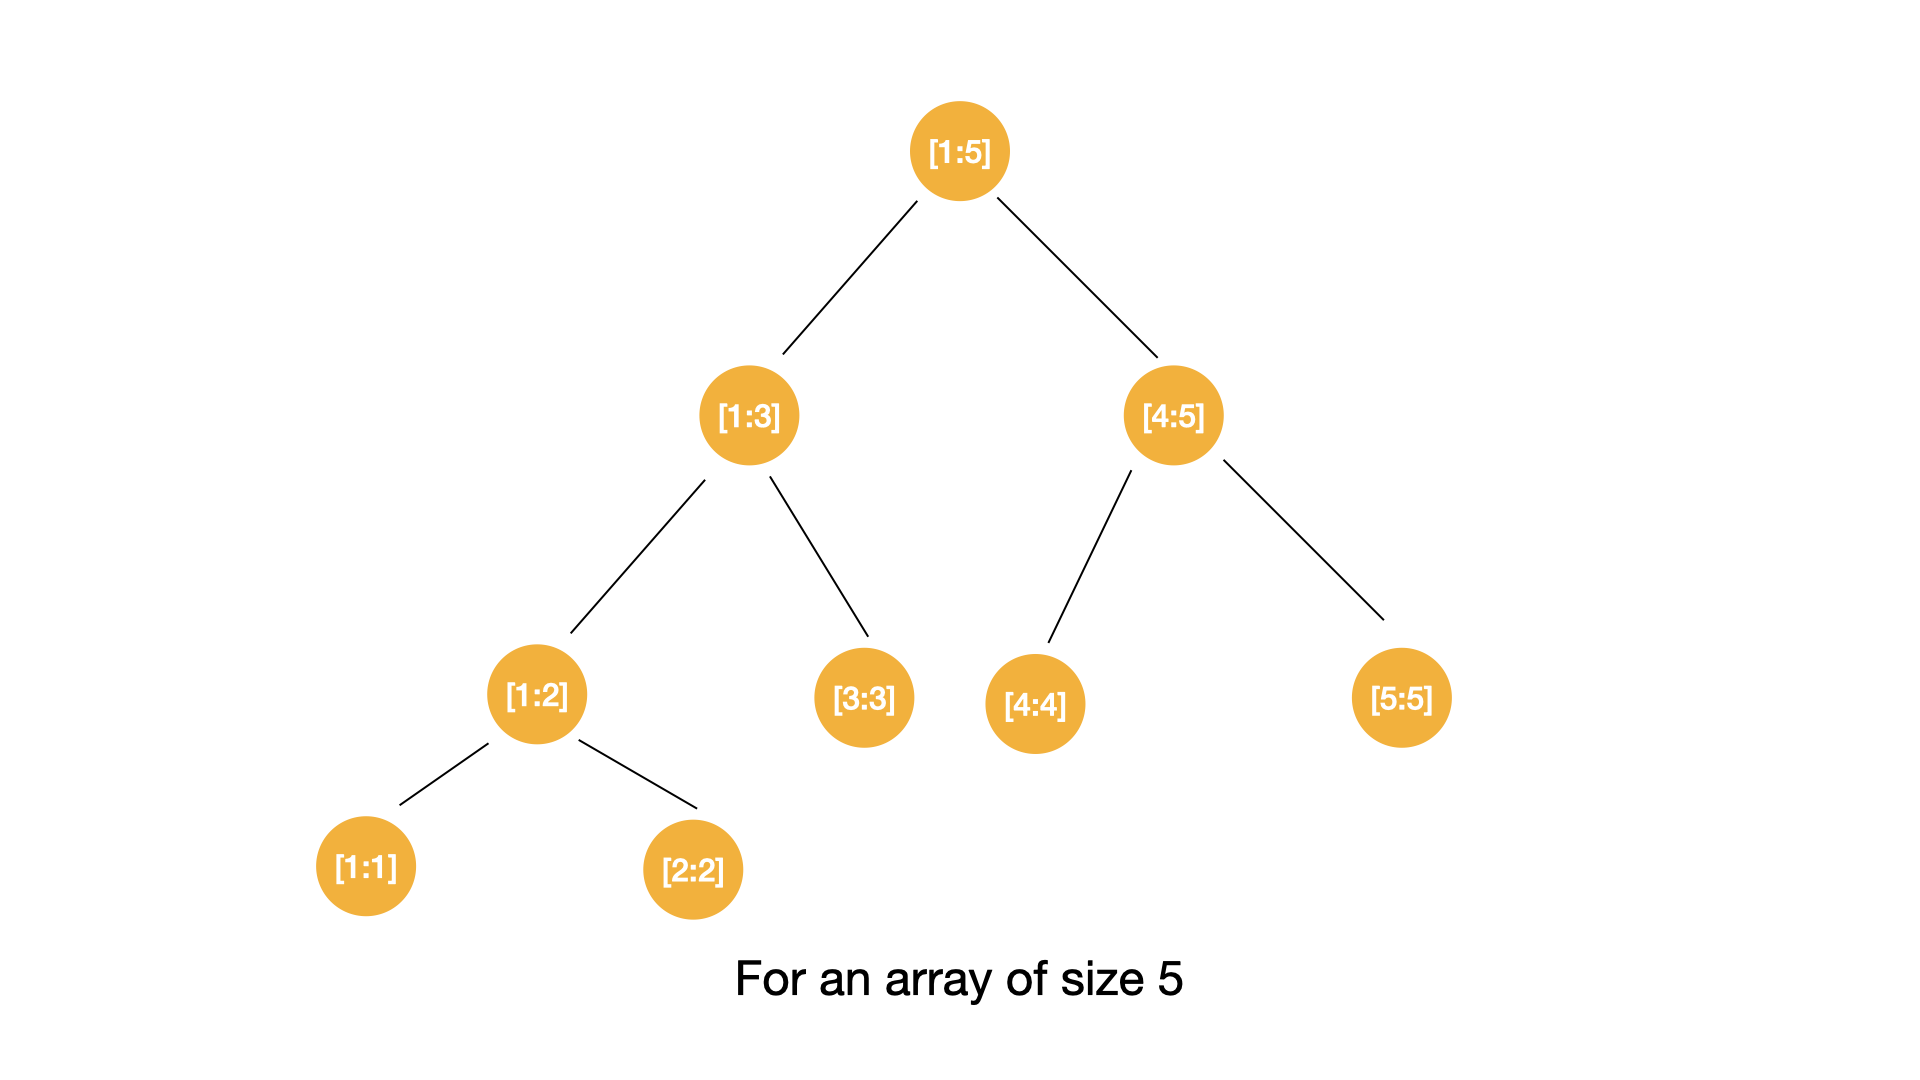

### Query and Update
Query: Move down tree until segment rperesnted by tree is completely within interval bounds<br><br>
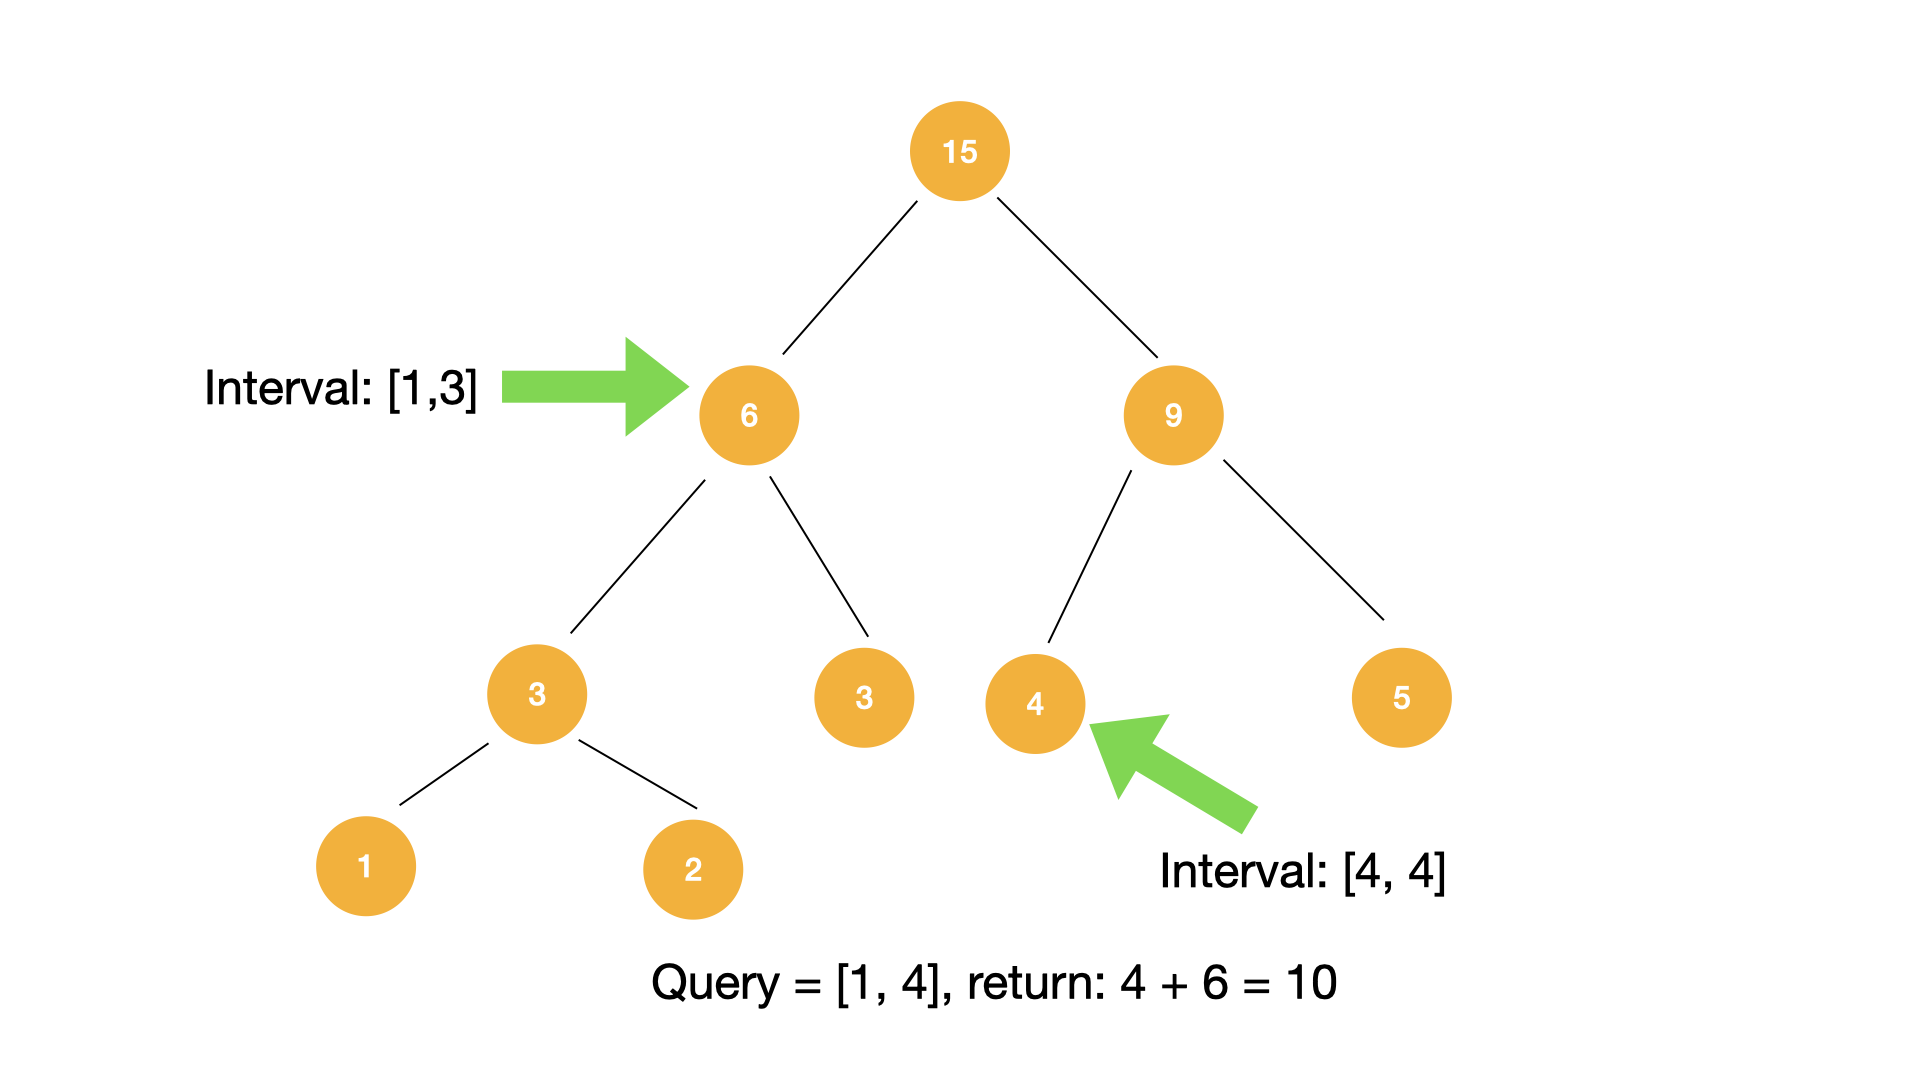<br><br>
Update: All the way down to leaf node that contians only that node and update it, then resolve recursive stack to update all parent nodes<br><br>
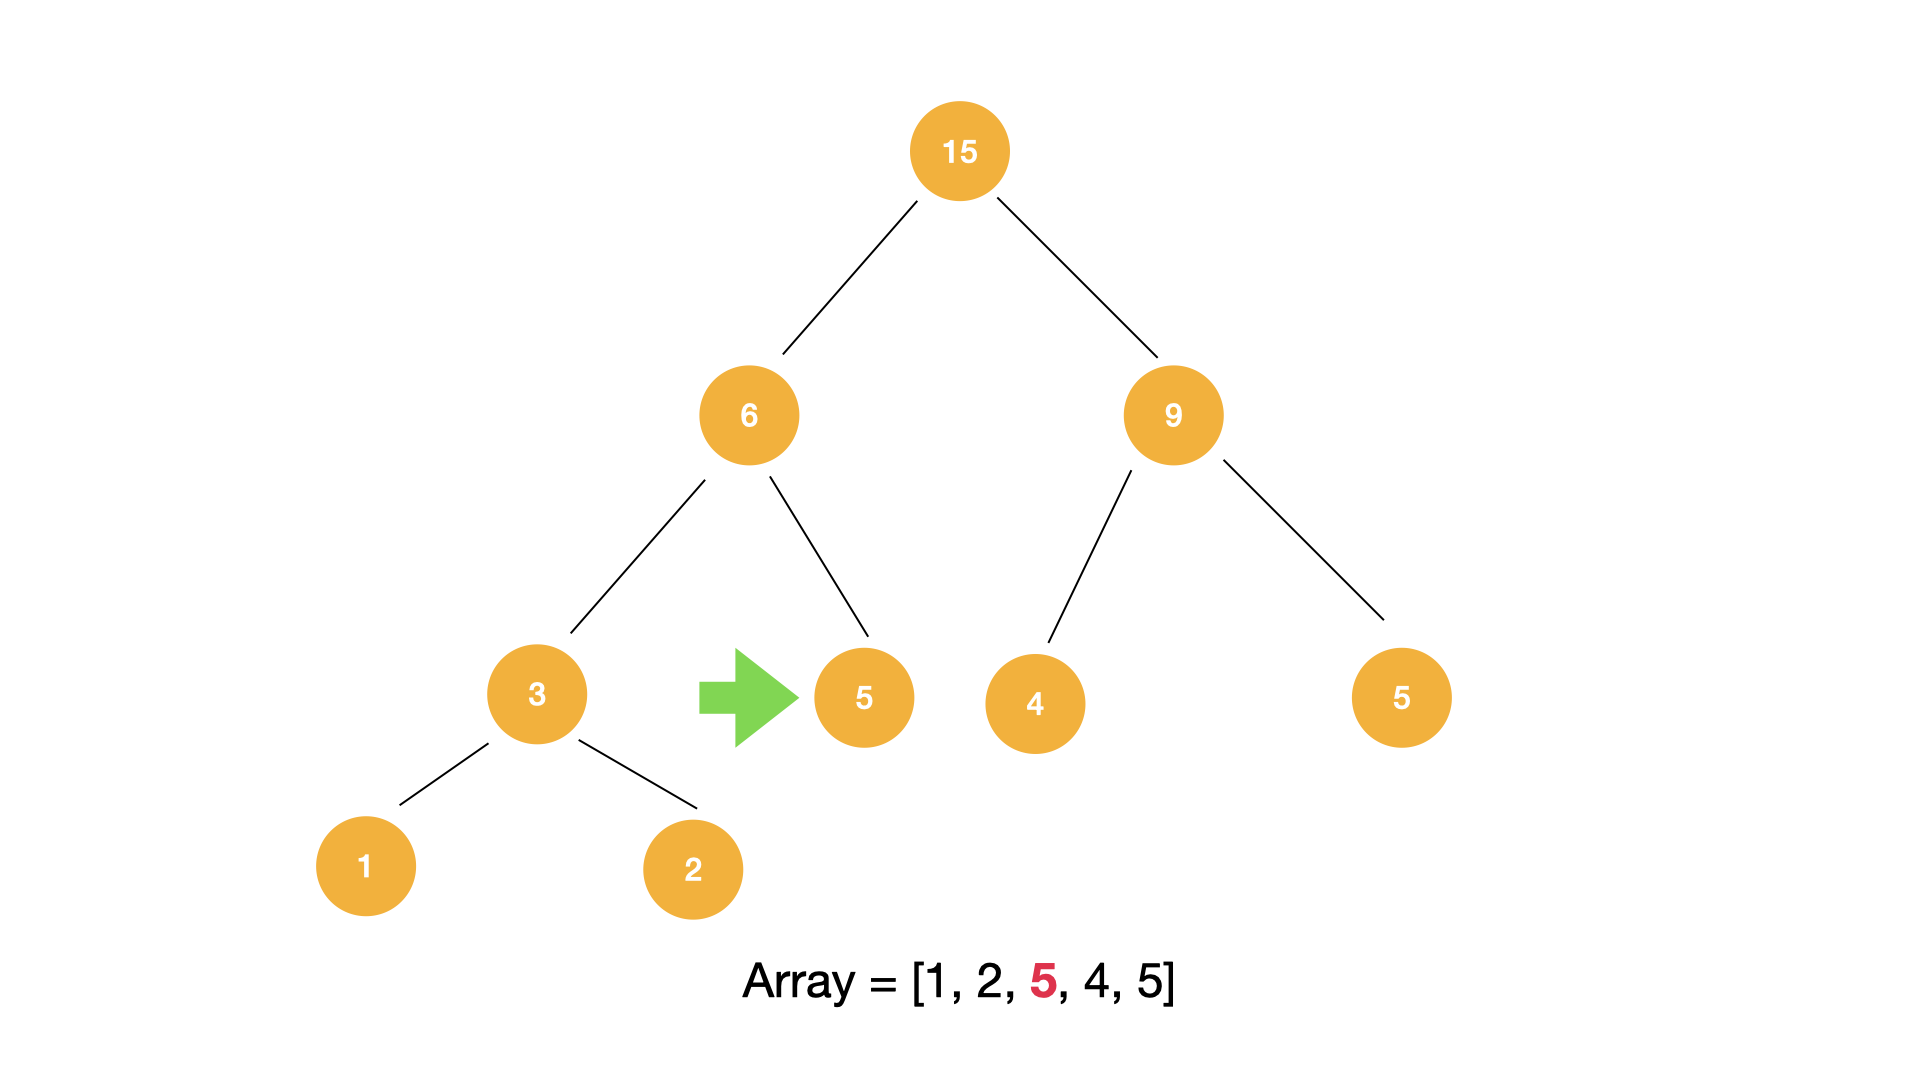

### For Interview
Only useful for range query problems

### Implementation

In [2]:
class SegmentTree:
    def __init__(self, arr):
        self.tree = [0] * (4 * len(arr))
        for i in range(len(arr)):
            self.update(1, 0, len(arr) - 1, i, arr[i])
    
    def update(self, cur, cur_left, cur_right, idx, val):
        # reach leaf node when left interval equals right interval
        if idx == cur_left == cur_right:
            self.tree[cur] = val
        else:
            # value of midpoint where segment is cut in half
            cur_mid = (cur_left + cur_right) // 2
            if idx <= cur_mid:
                self.update(cur * 2, cur_left, cur_mid, idx, val)
            else:
                self.update(cur * 2 + 1, cur_mid + 1, cur_right, idx, val)
            # compute value of new node (can be changed for other use cases)
            self.tree[cur] = self.tree[cur * 2] + self.tree[cur * 2 + 1]

    def query(self, cur, cur_left, cur_right, query_left, query_right):
        # if current left interval greater than queried right interval, out of range
        # if current right interval less than queried left interval, out of range
        if cur_left > query_right or cur_right < query_left:
            return 0
        # if in range, return current interval
        elif query_left <= cur_left and cur_right <= query_right:
            return self.tree[cur]
        # part of interval in range, but part not in range, query both children
        cur_mid = (cur_left + cur_right) // 2
        # get value (can be changed for other use cases)
        return self.query(cur * 2, cur_left, cur_mid, query_left, query_right) + self.query(cur * 2 + 1, cur_mid + 1, cur_right, query_left, query_right)

In [3]:
segment_tree = SegmentTree([1, 2, 3, 4, 5])
segment_tree.tree

[0, 15, 6, 9, 3, 3, 4, 5, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]